In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm 
from sklearn import linear_model
import sklearn

In [2]:
#importing more necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv('testing_dataset.csv')
data.drop('Unnamed: 0', axis = 1, inplace = True)
data.head()

,house_hold_no,state,district,rural,sex,usual_residance,marital_status,highest_qualification,occupation_status,disability_status,...,owner_status,is_water_filter,is_toilet_shared,household_have_electricity,lighting_source,cooking_fuel,kitchen_availability,is_refrigerator,iscoveredbyhealthscheme,y
0,1,5,9,1,2.0,2.0,0.0,0.0,4.0,0.0,...,3.0,2.0,2.0,2.0,6.0,1.0,5.0,2.0,2.0,69.0
1,1,5,2,1,1.0,1.0,1.0,4.0,1.0,0.0,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,28.0
2,1,5,1,0,1.0,1.0,1.0,8.0,2.0,0.0,...,2.0,2.0,2.0,1.0,1.0,6.0,4.0,2.0,2.0,45.0
3,6,5,1,0,2.0,1.0,3.0,4.0,0.0,0.0,...,2.0,1.0,2.0,1.0,1.0,6.0,1.0,1.0,2.0,50.0
4,2,5,2,1,2.0,1.0,3.0,4.0,0.0,0.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,36.0


In [4]:
data['age'] = data['y']
data.drop('y', axis = 1, inplace = True)

In [5]:
data.columns

Index(['house_hold_no', 'state', 'district', 'rural', 'sex', 'usual_residance',
       'marital_status', 'highest_qualification', 'occupation_status',
       'disability_status', 'chew', 'smoke', 'alcohol', 'owner_status',
       'is_water_filter', 'is_toilet_shared', 'household_have_electricity',
       'lighting_source', 'cooking_fuel', 'kitchen_availability',
       'is_refrigerator', 'iscoveredbyhealthscheme', 'age'],
      dtype='object')

In [6]:
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [7]:
todummy_list = ['house_hold_no', 'state', 'district', 'marital_status',
                'highest_qualification', 'occupation_status', 'disability_status',
                'chew', 'smoke', 'alcohol', 'lighting_source', 'cooking_fuel',
                'kitchen_availability', 'iscoveredbyhealthscheme', 'owner_status']

In [8]:
df = dummy_df(data, todummy_list)
df.head()

,rural,sex,usual_residance,is_water_filter,is_toilet_shared,household_have_electricity,is_refrigerator,age,house_hold_no_0,house_hold_no_1,...,kitchen_availability_1.0,kitchen_availability_3.0,kitchen_availability_4.0,kitchen_availability_5.0,iscoveredbyhealthscheme_1.0,iscoveredbyhealthscheme_2.0,iscoveredbyhealthscheme_3.0,owner_status_1.0,owner_status_2.0,owner_status_3.0
0,1,2.0,2.0,2.0,2.0,2.0,2.0,69.0,0,1,...,0,0,0,1,0,1,0,0,0,1
1,1,1.0,1.0,1.0,2.0,1.0,2.0,28.0,0,1,...,1,0,0,0,0,1,0,1,0,0
2,0,1.0,1.0,2.0,2.0,1.0,2.0,45.0,0,1,...,0,0,1,0,0,1,0,0,1,0
3,0,2.0,1.0,1.0,2.0,1.0,1.0,50.0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,1,2.0,1.0,2.0,2.0,1.0,2.0,36.0,0,0,...,1,0,0,0,1,0,0,1,0,0


In [9]:
X = df.drop('age', 1)
y = df['age']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((389799, 136), (97450, 136), (389799,), (97450,))

In [12]:
import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k=70)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

# Linear Regression

In [13]:
cls = linear_model.LinearRegression()
#Fit method is used for fitting your training data into the model
cls.fit(X_train_selected,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
prediction = cls.predict(X_test_selected)

In [15]:
cls.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [16]:
print('Co-efficient of linear regression',cls.coef_)

Co-efficient of linear regression [-4.36574794e-01 -1.01066329e+01  8.89000122e+00 -6.95745605e-01
 -1.97704635e+00 -2.84632858e+00  4.78156425e+00 -3.48658427e-01
 -1.69553762e+00 -1.29179477e+00  1.28223079e+00  1.96013173e+00
 -4.48768789e-01  1.06114418e+00  2.33389958e+00 -1.47662446e-01
  1.00096390e+00  9.46915162e-01 -2.35738489e-01 -1.09999436e+01
 -2.19263879e+00  7.71547047e+00  2.56256487e+00  7.32581707e-01
 -1.16794856e+00 -3.00835878e+00 -1.72065932e+00 -3.57961523e+00
 -2.12397720e+00  3.88388868e+00 -4.86435461e+00 -7.87787216e+00
  2.64441342e+01 -1.74220400e+00  4.97393925e+00  4.77233214e+00
 -3.16893672e+00  2.70658842e+00  1.58966244e+00 -1.17783096e+00
  2.71435907e+00  5.14505697e+00  1.21409273e+00 -6.01134900e+11
 -6.01134900e+11 -6.01134900e+11 -6.01134900e+11 -6.01134900e+11
  7.43281038e+11  7.43281038e+11  7.43281038e+11  7.43281038e+11
  7.43281038e+11 -8.14851643e-01 -1.46600958e+00  2.20631414e+00
  1.16522171e-01 -4.25607011e-01  1.10023173e+00  2.3666

In [17]:
print('Intercept of linear regression model',cls.intercept_)

Intercept of linear regression model -23308721469302.977


In [18]:
print('Mean Square Error', metrics.mean_squared_error(y_test, prediction))

Mean Square Error 138.162593462236


In [19]:
print('Mean Absolute Error', metrics.mean_absolute_error(y_test, prediction))

Mean Absolute Error 9.444429394881992


In [20]:
print('Model R^2 Square value', metrics.r2_score(y_test, prediction))

Model R^2 Square value 0.31733408947909747


# Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_selected, y_train)
y_preddt = dt.predict(X_test_selected)
print("Accuracy:", metrics.accuracy_score(y_test, y_preddt))

Accuracy: 0.1719856336582863


# Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train_selected, y_train)
y_predrf = rf.predict(X_test_selected)
print("Accuracy:", metrics.accuracy_score(y_test, y_predrf))

Accuracy: 0.17371985633658285


# K - Nearest Neighbors

In [23]:
# from sklearn.neighbors import KNeighborsClassifier
# neigh = KNeighborsClassifier(n_neighbors=5)
# neigh.fit(X_train_selected, y_train)
# y_predsneigh = neigh.predict(X_test_selected)
# print("Accuracy:", metrics.accuracy_score(y_test, y_predsneigh))

In [24]:
# Note the difference in argument order
model = sm.OLS(y_train, X_train_selected).fit() ## sm.OLS(output, input)
predictions = model.predict(X_test_selected)

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     2813.
Date:                Tue, 14 Apr 2020   Prob (F-statistic):               0.00
Time:                        00:24:17   Log-Likelihood:            -1.5145e+06
No. Observations:              389799   AIC:                         3.029e+06
Df Residuals:                  389733   BIC:                         3.030e+06
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
rural             

/Users/eddiecpognon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  """


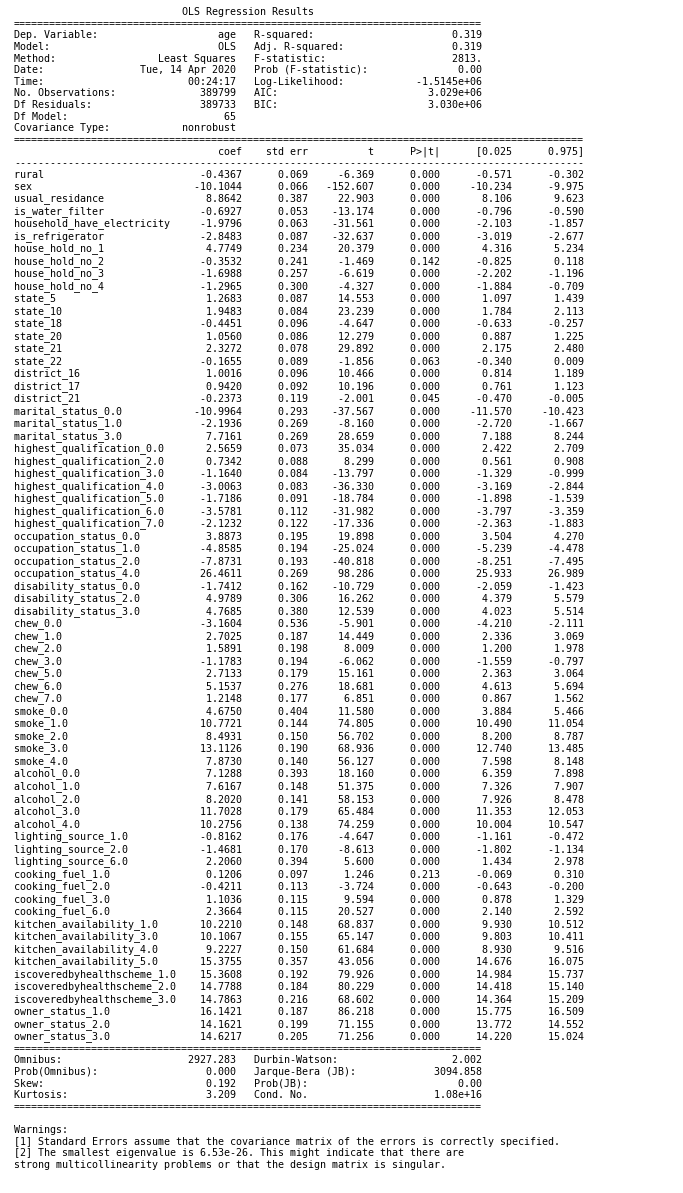

In [25]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()

Text(0, 0.5, 'Residual')

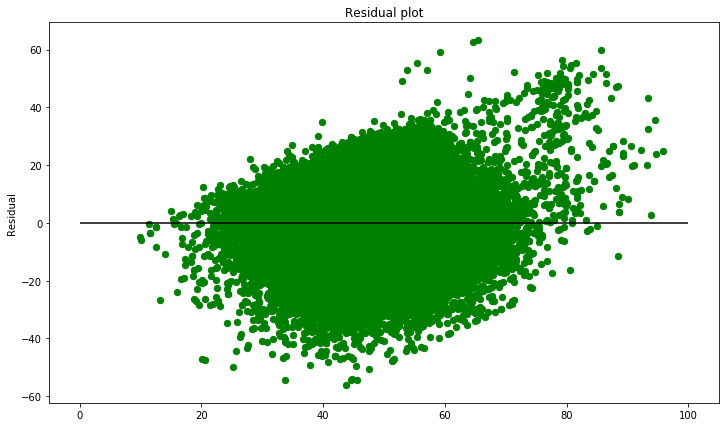

In [26]:
#Residual plot
plt.scatter(cls.predict(X_test_selected), cls.predict(X_test_selected) - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')

# Post Analysis

In [27]:
correlated_data = data[['house_hold_no', 'sex', 'marital_status', 'highest_qualification',
                        'occupation_status', 'age']]
correlated_data.head()

,house_hold_no,sex,marital_status,highest_qualification,occupation_status,age
0,1,2.0,0.0,0.0,4.0,69.0
1,1,1.0,1.0,4.0,1.0,28.0
2,1,1.0,1.0,8.0,2.0,45.0
3,6,2.0,3.0,4.0,0.0,50.0
4,2,2.0,3.0,4.0,0.0,36.0


In [28]:
todummy_list = ['house_hold_no', 'marital_status',
                'highest_qualification', 'occupation_status']

In [29]:
X = dummy_df(correlated_data, todummy_list)
X.head()

,sex,age,house_hold_no_0,house_hold_no_1,house_hold_no_2,house_hold_no_3,house_hold_no_4,house_hold_no_5,house_hold_no_6,house_hold_no_7,...,highest_qualification_5.0,highest_qualification_6.0,highest_qualification_7.0,highest_qualification_8.0,highest_qualification_9.0,occupation_status_0.0,occupation_status_1.0,occupation_status_2.0,occupation_status_3.0,occupation_status_4.0
0,2.0,69.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,28.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1.0,45.0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,2.0,50.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,2.0,36.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [30]:
X = df.drop('age', axis = 1)
y = df['age']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((389799, 136), (97450, 136), (389799,), (97450,))

In [33]:
select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

In [34]:
cls = linear_model.LinearRegression()
#Fit method is used for fitting your training data into the model
cls.fit(X_train_selected,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
prediction = cls.predict(X_test_selected)

In [36]:
cls.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [37]:
print('Co-efficient of linear regression',cls.coef_)

Co-efficient of linear regression [-10.39322516   8.02692035   5.7573302  -11.71278845  -2.27359652
   8.15843603   2.61625453   9.85767142  -2.76270696  33.75087453
  -4.11430754  -5.71062552  -2.25748323  -0.91973993   2.05807599
   2.82552891   4.59439554  -0.32708211   0.50449089  -1.05137535]


In [38]:
print('Intercept of linear regression model',cls.intercept_)

Intercept of linear regression model 43.59544227799136


In [39]:
print('Mean Square Error', metrics.mean_squared_error(y_test, prediction))

Mean Square Error 145.67198786224094


In [40]:
print('Model R^2 Square value', metrics.r2_score(y_test, prediction))

Model R^2 Square value 0.2802299251964464


In [41]:
print('Mean Absolute Error', metrics.mean_absolute_error(y_test, prediction))

Mean Absolute Error 9.755451902519592


Text(0, 0.5, 'Residual')

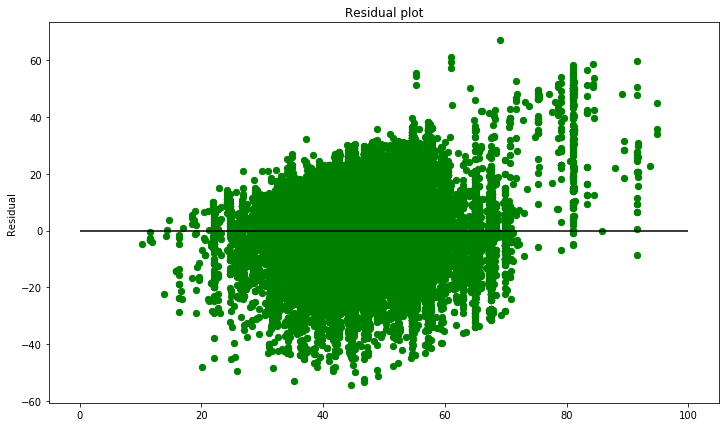

In [42]:
#Residual plot
plt.scatter(cls.predict(X_test_selected), cls.predict(X_test_selected) - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')

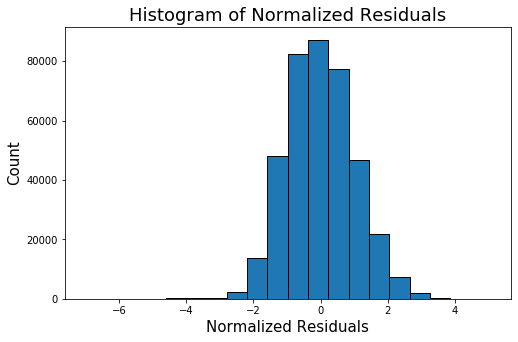

In [43]:
fig = plt.figure(figsize=(8,5))
plt.hist(model.resid_pearson,bins=20,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized Residuals',fontsize=15)
plt.title("Histogram of Normalized Residuals",fontsize=18)
plt.show()
fig.savefig('/Users/eddiecpognon/Desktop/Data_Science/FinalProject/Life_Expectancy/images/nresiduals.png', bbox_inches = 'tight')

In [44]:
from statsmodels.graphics.gofplots import qqplot

<Figure size 360x360 with 0 Axes>

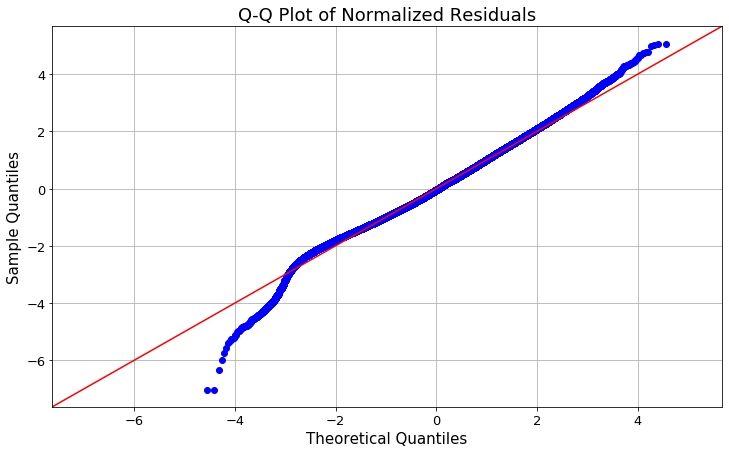

In [45]:
fig = plt.figure(figsize=(5,5))
fig1 = qqplot(model.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical Quantiles",fontsize=15)
plt.ylabel("Sample Quantiles",fontsize=15)
plt.title("Q-Q Plot of Normalized Residuals",fontsize=18)
plt.grid(True)
plt.show()
fig1.savefig('/Users/eddiecpognon/Desktop/Data_Science/FinalProject/Life_Expectancy/images/qqplot.png', bbox_inches = 'tight')

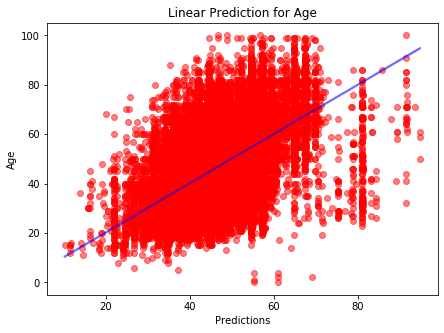

In [46]:
#Visualising the linear predicition for age
fig = plt.figure(figsize=(7,5))
sns.regplot(prediction,y_test,scatter_kws={'alpha':0.5,'color':'red'},line_kws={'color':'blue','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Age')
plt.title("Linear Prediction for Age")
plt.show()
fig.savefig('/Users/eddiecpognon/Desktop/Data_Science/FinalProject/Life_Expectancy/images/lrage.png', bbox_inches = 'tight')